In [24]:
%%html
<style type='text/css'>
.CodeMirror{
    font-size: 18px;
}

div.output_area pre {
    font-size: 16px;
}
</style>

In [1]:
import numpy as np
import scipy
from scipy import stats

import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
np.set_printoptions(suppress=True)

# 1. Ví dụ F-Test

**Tính F-score của 2 chuỗi data**

In [3]:
x = [18, 19, 22, 25, 27, 28, 41, 45, 51, 55]
y = [14, 15, 15, 17, 18, 22, 25, 25, 27, 34]

In [4]:
# Lưu ý: số phần tử trong mỗi chuỗi < 30
var_x = np.var(x, ddof=1)
var_y = np.var(y, ddof=1)

In [5]:
print(var_x)
print(var_y)

186.98888888888888
42.62222222222223


In [6]:
f_score = var_x/var_y
print(f_score)

4.387122002085505


**Tính p-Value cho F-score trong kiểm thử trên**

In [7]:
# Trong trường hợp này: degree of freedom bằng (n-1)
df_x = len(x) - 1
df_y = len(y) - 1
p_value = 1- stats.f.cdf(f_score, df_x, df_y)

In [8]:
print(p_value)
print(p_value < 0.05)

0.01912653593238578
True


**Thử lại với hàm tạo data**

In [9]:
f_data = np.random.f(dfnum=df_x, dfden=df_y, size=10000)

In [10]:
# Giá trị tại CV=95%
cv95 = np.percentile(f_data, [95])
cv95

array([3.1254889])

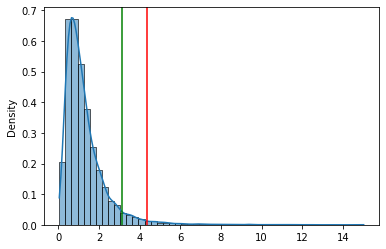

In [11]:
# Vẽ lên biểu đồ để so sánh vị trí f-score và cv95
ax = sns.histplot(f_data, bins=50, kde=True, stat='density')
plt.axvline(f_score, color='r')
plt.axvline(cv95, color='g')

In [12]:
# p-Value
np.count_nonzero(f_data>=f_score)/f_data.size

0.0184

# 2. Ví dụ ANOVA

**Giả sử có 3 chuỗi data**

In [13]:
x = np.array([18, 19, 22, 25, 27, 28, 31, 25, 21, 35])
y = np.array([14, 15, 15, 17, 18, 22, 25, 25, 27, 34])
z = np.array([30, 22, 19, 18, 29, 16, 24, 20, 17, 26])
var_x = np.var(x, ddof=1)
var_y = np.var(y, ddof=1)
var_z = np.var(z, ddof=1)

print(var_x, var_y, var_z)

28.766666666666666 42.62222222222223 24.766666666666666


**Tính mean của từng chuỗi, và mean của cả 3 chuỗi**

In [14]:
print(x.mean(), y.mean(), z.mean())

25.1 21.2 22.1


In [15]:
mean_all = np.mean([x,y,z])
print(mean_all)

22.8


**Tính Sum-of-Square Between Groups (SSB)**

In [16]:
SSB = x.size*(x.mean() - mean_all)**2 + \
      y.size*(y.mean() - mean_all)**2 + \
      z.size*(z.mean() - mean_all)**2
print(SSB)

83.40000000000008


**Tính Sum-of-Square (Errors) Within Groups (SSE/SSW)**

In [17]:
SSE = np.sum((x - x.mean())**2) + \
      np.sum((y - y.mean())**2) + \
      np.sum((z - z.mean())**2)
print(SSE)

865.4


**Tính degree of freedom**

In [18]:
k = 3#len([x,y,z])
N = sum([x.size, y.size, z.size])
print(k, N)

3 30


**Tính MST và MSE** 

In [ ]:
MST = SSB/(k - 1)
MSE = SSE/(N - k)

**Tính F-score**

In [19]:
f = MST/MSE
print(f)

1.3010168708111869


**Phát sinh data để so sánh với F-score**

In [20]:
f_data = np.random.f(dfnum=k-1, dfden=N-k, size=10000)

In [21]:
# Giá trị tại CV=95%
np.percentile(f_data, [100-5])

array([3.27764157])

**Tính p-Value**

In [22]:
# p-Value
np.count_nonzero(f_data>=f)/f_data.size

0.2756

**Vẽ lên biểu đồ để trực quan hóa kết quả**

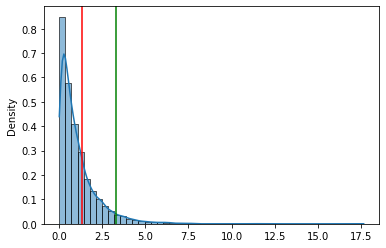

In [23]:
ax = sns.histplot(f_data, bins=50, kde=True, stat='density')
plt.axvline(f, color='r')
plt.axvline(np.percentile(f_data, [95]), color='g')